In [1]:
import csv

In [142]:
# import numerical python extension
import numpy as np

In [3]:
# import chemoinformatics utils
from rdkit.Chem import (
    MolFromSmiles,
    rdmolops
)

In [4]:
# import all the keras stuff (tensorflow backend however)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

Using TensorFlow backend.


In [199]:
def get_molecules_train_data(c_atoms, file_name='data\data_set.csv'):
    # adj matrices
    x_train = []
    # expreminetal values
    y_train = []
    try:
        with open(file_name) as data_set:
            csv_reader = csv.reader(data_set, delimiter='\t')
            # skip header
            next(csv_reader, None)
            for row in csv_reader:
                smiles_structure, ron, mon = row
                mol = MolFromSmiles(smiles_structure)
                # lets assume only C in structure
#                 if mol.GetNumAtoms() != c_atoms:
#                     continue
                adj_matrix = rdmolops.GetAdjacencyMatrix(mol, useBO=True)
                x_train.append(adj_matrix / 2)
                y_train.append(float(ron))
    except FileNotFoundError:
        raise
    return x_train, y_train

In [200]:
# get train data
magic_carbon_number=15
x_train__, y_train = get_molecules_train_data(magic_carbon_number)
x_train = []
for xx in x_train__:
    xx = np.pad(xx, ((0, magic_carbon_number-len(xx[0])), (0, magic_carbon_number-len(xx[0]))), mode='constant', constant_values=0)
    x_train.append(xx)
x_train = np.array(x_train).reshape(len(x_train), 1, magic_carbon_number, magic_carbon_number)

In [201]:
# build the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1, magic_carbon_number, magic_carbon_number)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

In [202]:
# compile model
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error',
              optimizer=rms,
              metrics=['mean_squared_error'])

In [219]:
model.fit(x_train, y_train,
          batch_size=8, epochs=100, verbose=1)

Epoch 1/100
66/66 [==============================] - 0s - loss: 45.1515 - mean_squared_error: 45.1515     
Epoch 2/100
66/66 [==============================] - 0s - loss: 60.2993 - mean_squared_error: 60.2993     
Epoch 3/100
66/66 [==============================] - 0s - loss: 43.4706 - mean_squared_error: 43.4706     
Epoch 4/100
66/66 [==============================] - 0s - loss: 43.0126 - mean_squared_error: 43.0126     
Epoch 5/100
66/66 [==============================] - 0s - loss: 44.9339 - mean_squared_error: 44.9339     
Epoch 6/100
66/66 [==============================] - 0s - loss: 29.9589 - mean_squared_error: 29.9589     
Epoch 7/100
66/66 [==============================] - 0s - loss: 41.0985 - mean_squared_error: 41.0985     
Epoch 8/100
66/66 [==============================] - 0s - loss: 34.5102 - mean_squared_error: 34.5102     
Epoch 9/100
66/66 [==============================] - 0s - loss: 63.7856 - mean_squared_error: 63.7856      ETA: 0s - loss: 65.5487 - mean_square

66/66 [==============================] - 0s - loss: 20.3808 - mean_squared_error: 20.3808     
Epoch 75/100
66/66 [==============================] - 0s - loss: 33.1730 - mean_squared_error: 33.1730     
Epoch 76/100
66/66 [==============================] - 0s - loss: 57.7775 - mean_squared_error: 57.7775     
Epoch 77/100
66/66 [==============================] - 0s - loss: 40.8859 - mean_squared_error: 40.8859     
Epoch 78/100
66/66 [==============================] - 0s - loss: 46.8398 - mean_squared_error: 46.8398     
Epoch 79/100
66/66 [==============================] - 0s - loss: 49.3013 - mean_squared_error: 49.3013     
Epoch 80/100
66/66 [==============================] - 0s - loss: 21.0573 - mean_squared_error: 21.0573     
Epoch 81/100
66/66 [==============================] - 0s - loss: 40.4618 - mean_squared_error: 40.4618     
Epoch 82/100
66/66 [==============================] - 0s - loss: 21.2344 - mean_squared_error: 21.2344      ETA: 0s - loss: 23.1577 - mean_squared_er

In [221]:
s = []
predicted = []
expected = []
for p, y in zip(model.predict(x_train), y_train):
    predicted.append(p)
    expected.append(y)
    if y != 0:
        print('pred:', p[0], 'expr:', y, 'error:', (abs(y-p[0])*100/y), '%')
        s.append(abs(y-p[0])*100/y)
print('mean acc:', np.mean(np.abs(s)), '%')

pred: 112.101 expr: 120.0 error: 6.58221562703 %
pred: 96.5521 expr: 99.0 error: 2.47263282236 %
pred: 93.4516 expr: 96.6 error: 3.25922995621 %
pred: 90.3945 expr: 89.1 error: 1.45281139849 %
pred: 92.6499 expr: 97.0 error: 4.48461316296 %
pred: 63.8808 expr: 63.2 error: 1.07718841939 %
pred: 87.8628 expr: 89.7 error: 2.04819389012 %
pred: 83.2459 expr: 80.2 error: 3.79782698101 %
pred: 29.2443 expr: 26.0 error: 12.4780581548 %
pred: 72.7688 expr: 73.3 error: 0.724684232579 %
pred: 77.232 expr: 73.5 error: 5.07752295254 %
pred: 93.8922 expr: 94.2 error: 0.326714647297 %
pred: 95.8744 expr: 93.4 error: 2.6492966319 %
pred: 71.5147 expr: 69.3 error: 3.19580694642 %
pred: 53.9623 expr: 55.0 error: 1.88664523038 %
pred: 46.8625 expr: 46.4 error: 0.996699826471 %
pred: 89.735 expr: 88.5 error: 1.3954550533 %
pred: 85.8536 expr: 83.8 error: 2.45065074547 %
pred: 91.7579 expr: 86.6 error: 5.955982869 %
pred: 94.3398 expr: 95.6 error: 1.31825083968 %
pred: 102.246 expr: 101.3 error: 0.9338318

In [245]:
x_ = [rdmolops.GetAdjacencyMatrix(MolFromSmiles('C=C-C=C'), useBO=True) / 2]
x = []
for xx in x_:
    xx = np.pad(xx, ((0, magic_carbon_number-len(xx[0])), (0, magic_carbon_number-len(xx[0]))), mode='constant', constant_values=0)
    x.append(xx)
x = np.array(x).reshape(len(x), 1, magic_carbon_number, magic_carbon_number)
print(x)

[[[[ 0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 1.   0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.5  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0. ]
   [

In [246]:
model.predict(x)

array([[ 97.66599274]], dtype=float32)

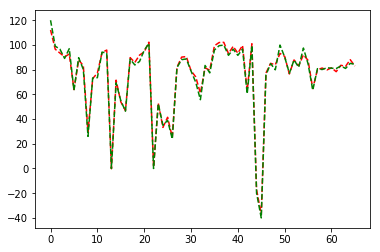

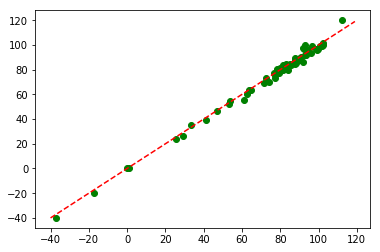

In [223]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(predicted))), predicted, 'r--', list(range(len(expected))), expected, 'g--')
plt.show()
plt.plot(predicted, expected, 'go', list(range(-40,120)), list(range(-40,120)), 'r--')
plt.show()

In [237]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress([p[0] for p in predicted], expected)
print ("r-squared:", r_value**2, "std_err:", std_err, "p_value:", p_value)

r-squared: 0.992778762993 std_err: 0.0108371089364 p_value: 2.98023673261e-70
